<a href="https://colab.research.google.com/github/Gibbons-Lab/isb_course_2023/blob/main/16S_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦠 Amplicon Sequencing Data Analysis with QIIME 2

This notebook will accompany the first session of the 2024 ISB Virtual Microbiome Series. The presentation slides can be [found here](https://gibbons-lab.github.io/isb_course_2024/16S).

Save your own local copy of this notebook by using `File > Save a copy in Drive`. At some point you may be prompted to trust the notebook. We promise that it is safe 🤞

**Disclaimer:**

The Google Colab notebook environment will interpret any command as Python code by default. If we want to run bash commands we will have to prefix them by `!`. So any command you see with a leading `!` is a bash command and if you wanted to run it in your terminal you would omit the `!`. For example, if in the Colab notebook you ran `!wget` you would just run `wget` in your terminal.

## Setup

QIIME 2 is usually installed by following the [official installation instructions](https://docs.qiime2.org/2024.5/install/). However, because we are using Google Colab and there are some caveats to using conda here, we will have to hack around the installation a little bit. But no worries, we provide a setup script below which does all this work for us. 😌

So...let's start by pulling a local copy of the project repository down from GitHub.

In [14]:
!git clone https://github.com/gibbons-lab/isb_course_2024 materials

Cloning into 'materials'...
remote: Enumerating objects: 545, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (116/116), done.
^C


This repository, called __materials__, contains all the relevant data and other resources we'll need for this course. To view the directory, click on the folder icon on the left. Let's navigate to that directory via command line now:

In [17]:
%cd materials

[Errno 2] No such file or directory: 'materials'
/content/materials


Notice here we use ```%``` instead of ```!``` to run out command line function. This makes the path change to our directory permanent: using the ```!``` operator only switches the interpreter to expect command line prompts temporarily.




## Install QIIME2

Now that we have all our materials, we're _almost_ ready to get started - but not quite. Remember QIIME2? We'll need to install that before getting into the actual analysis. Don't worry - this will only set up in the Colab notebook, not on your local machine.

Let's run the following cell, to install and setup QIIME2.

In [3]:
%run setup_qiime2

[06:47:35] 🐍 Downloading miniforge...                                                              ]8;id=226070;file:///content/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=70117;file:///content/materials/setup_qiime2#67\67]8;;\

[06:47:36] 🐍 Done.                                                                                 ]8;id=86631;file:///content/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=463233;file:///content/materials/setup_qiime2#73\73]8;;\

           🐍 Installing miniforge...                                                               ]8;id=868215;file:///content/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=661304;file:///content/materials/setup_qiime2#67\67]8;;\

[06:47:49] 🐍 Installed miniforge to `/usr/local`.                                                  ]8;id=677582;file:///content/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=422470;file:///content/materials/setup_qiime2#73\73]8;;\

           🔍 Downloading Qiime 2 package list...                                                   ]8;id=448899;file:///content/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=564336;file:///content/materials/setup_qiime2#67\67]8;;\

[06:47:50] 🔍 Done.                                                                                 ]8;id=342050;file:///content/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=926781;file:///content/materials/setup_qiime2#73\73]8;;\

           🔍 Installing Qiime 2. This may take a little bit.                                       ]8;id=249824;file:///content/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=761050;file:///content/materials/setup_qiime2#67\67]8;;\
            🕐                                                                                                     

[06:52:31] 🔍 Done.                                                                                 ]8;id=433346;file:///content/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=446451;file:///content/materials/setup_qiime2#73\73]8;;\

           🌲 Installing Empress...                                                                 ]8;id=865037;file:///content/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=644948;file:///content/materials/setup_qiime2#67\67]8;;\

[06:52:35] 🌲 Done.                                                                                 ]8;id=890120;file:///content/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=112239;file:///content/materials/setup_qiime2#73\73]8;;\

           📊 Checking that Qiime 2 command line works...                                           ]8;id=987481;file:///content/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=773870;file:///content/materials/setup_qiime2#67\67]8;;\

[06:52:46] 📊 Qiime 2 command line looks good 🎉                                                    ]8;id=618646;file:///content/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=841762;file:///content/materials/setup_qiime2#73\73]8;;\

           🧹 Cleaned up unneeded files.                                                            ]8;id=572194;file:///content/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=494159;file:///content/materials/setup_qiime2#62\62]8;;\

           Everything is A-OK. You can start using Qiime 2 now 👍                                  ]8;id=606947;file:///content/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=527467;file:///content/materials/setup_qiime2#149\149]8;;\

⬆️ This will take some time (usually 10 to 15 minutes), so we'll switch back over to the [presentation](https://gibbons-lab.github.io/isb_course_2024/16S) while we wait.

If you want to learn more about QIIME2, we recommend you check out the [documentation](https://docs.qiime2.org/). This will also explain how to install QIIME2 on your local machine 🖥

## Let's Get Started!

Now we're on to the fun part. Let's begin by taking a look at our data. In the __data__ folder, you'll find 10 FASTQ files, a file manifest, and a metadata file. Let's take a look at the manifest, first. This is a file that contains the name, and filepath of all our samples, and we'll need it later on when we use QIIME2 📝.

In [20]:
import pandas as pd
manifest = pd.read_csv('data/manifest.tsv', sep = '\t')
manifest

,sample-id,absolute-filepath
0,ERR1513701,$PWD/data/ERR1513701.fastq.gz
1,ERR1513870,$PWD/data/ERR1513870.fastq.gz
2,ERR1513889,$PWD/data/ERR1513889.fastq.gz
3,ERR1513684,$PWD/data/ERR1513684.fastq.gz
4,ERR1513703,$PWD/data/ERR1513703.fastq.gz
5,ERR1514003,$PWD/data/ERR1514003.fastq.gz
6,ERR1513961,$PWD/data/ERR1513961.fastq.gz
7,ERR1513983,$PWD/data/ERR1513983.fastq.gz
8,ERR1513964,$PWD/data/ERR1513964.fastq.gz
9,ERR1513777,$PWD/data/ERR1513777.fastq.gz


We can also check out the metadata file, which will give us more context on our samples 🔬

In [8]:
metadata = pd.read_csv('data/metadata.tsv', sep='\t')
metadata

,id,parkinson_disease,sex,age,bmi,stool_travel_time,location,anticholinergic,carbidopa_levodopa,comt_inhibitor,p3m_antibiotics_bool,p3m_constipation,fruits_or_vegetables,grains
0,ERR1513684,Yes,male,58.0,25.33,6.0,"Atlanta, GA",N,Y,N,Yes,Yes,At least once a day,At least once a day
1,ERR1513701,Yes,male,78.0,18.99,2.0,"Atlanta, GA",N,Y,N,No,No,Few times a week,At least once a day
2,ERR1513703,Yes,female,53.0,27.92,4.0,"Atlanta, GA",N,Y,N,Yes,No,At least once a day,At least once a day
3,ERR1513777,No,female,62.0,22.96,1.0,"Albany, NY",N,N,N,No,No,At least once a day,At least once a day
4,ERR1513870,Yes,male,70.0,25.68,8.0,"Seattle, WA",N,Y,N,Yes,Yes,Few times a week,At least once a day
5,ERR1513889,Yes,male,78.0,30.51,3.0,"Seattle, WA",N,Y,N,No,No,At least once a day,Few times a week
6,ERR1513961,No,female,67.0,24.48,2.0,"Seattle, WA",N,N,N,Yes,No,At least once a day,At least once a day
7,ERR1513964,No,female,69.0,33.47,4.0,"Seattle, WA",N,N,N,No,No,At least once a day,Few times a week
8,ERR1513983,No,female,72.0,25.84,2.0,"Seattle, WA",N,N,N,No,No,At least once a day,At least once a day
9,ERR1514003,No,male,63.0,31.29,3.0,"Seattle, WA",N,N,N,No,No,At least once a day,N


Looks good, all 10 FASTQ files are accounted for, five healthy and five with Parkinson's Disease. We can use the manifest file to import our files into QIIME2.

## QIIME2 Pipeline

Let's remind ourselves what the QIIME2 pipeline will do:
![our workflow](https://github.com/Gibbons-Lab/isb_course_2024/raw/main/docs/16S/assets/steps.png)

To use sequencing data in QIIME2, we first need to turn the FASTQ files containing our data into QIIME artifacts. Using the manifest we just checked out, let's run our first command:

-- as a reminder, adding ```!``` before the command tells the notebook this is a bash command, rather than python.

In [24]:
!qiime tools import \
  --type 'SampleData[SequencesWithQuality]' \
  --input-path data/manifest.tsv \
  --output-path sequences.qza \
  --input-format SingleEndFastqManifestPhred33V2

Imported data/manifest.tsv as SingleEndFastqManifestPhred33V2 to sequences.qza


Let's take a look a the command. QIIME commands take following format:

```
qiime plugin action --i-argument1 ... --o-argument2 ...
```
In the previous command, we are calling the ```tools``` plugin within QIIME2 to import our data. The following arguments designate where the manifest is, as well as where the output should be saved. We also tell QIIME2 what sort of input to expect.

Argument types usually begin with a letter denoting their meaning:

- `--i-...` = input files
- `--o-...` = output files
- `--p-...` = parameters
- `--m-...` = metadata

---

## Visualizing our Data 🔎

Before we move on, let's use QIIME2 to visualize our sequencing data.

In [22]:
!qiime demux summarize \
--i-data sequences.qza \
--o-visualization qualities.qzv

Saved Visualization to: qualities.qzv


.qzv files like the one we just produced are visualization. You can view the plot by downloading the file and opening it using http://view.qiime2.org. To download the file click on the folder symbol to the left, open the `materials` folder, and choose download from the dot menu next to the `qualities.qzv` file.

---

## Quality Filtering


Before we can use our sequencing data, we need to "denoise" it. To do this, we'll use a plugin called DADA2. This involves three things.

1. filter and trim the reads
2. find the most likely set of unique sequences in the sample (ASVs)
3. remove chimeras
4. count the abundances of each ASV


This command will take a little time - let's run it, and head back to the presentation to discuss what's happening.

In [23]:
!qiime dada2 denoise-single \
    --i-demultiplexed-seqs sequences.qza \
    --p-trunc-len 150 \
    --p-n-threads 2 \
    --output-dir dada --verbose

Running external command line application(s). This may print messages to stdout and/or stderr.
The command(s) being run are below. These commands cannot be manually re-run as they will depend on temporary files that no longer exist.

Command: run_dada.R --input_directory /tmp/qiime2/root/data/a63c9ae0-1ac5-4c21-a99a-46ef3dcb0b43/data --output_path /tmp/tmp88diqg95/output.tsv.biom --output_track /tmp/tmp88diqg95/track.tsv --filtered_directory /tmp/tmp88diqg95 --truncation_length 150 --trim_left 0 --max_expected_errors 2.0 --truncation_quality_score 2 --max_length Inf --pooling_method independent --chimera_method consensus --min_parental_fold 1.0 --allow_one_off False --num_threads 2 --learn_min_reads 1000000 --homopolymer_gap_penalty NULL --band_size 16

Warning message:
package ‘optparse’ was built under R version 4.2.3 
R version 4.2.2 (2022-10-31) 
Loading required package: Rcpp
DADA2: 1.26.0 / Rcpp: 1.0.11 / RcppParallel: 5.1.6 
2) Filtering ..........
3) Learning Error Rates
270565


If this step takes too long or fails, you can also copy the results from the treasure chest with the following command.

In [ ]:
# obscure magic that will only copy if the previous command failed
![ -d dada ] || cp -r treasure_chest/dada .

Let's check to see how that went. One good way to tell if the identified ASVs are representative of the sample is to see how many reads were maintained throughout the pipeline. Here, the most common issues and solutions are:

**Large fraction of reads is lost during merging (only paired-end)**

![read overlap](https://gibbons-lab.github.io/isb_course_2024/16S/assets/read_overlap.png)

In order to merge ASVs DADA2 uses an overlap of 12 bases between forward and reverse reads by default. Thus, your reads must allow for sufficient overlap *after* trimming. So if your amplified region is 450bp long and you have 2x250bp reads and you trim the last 30 bases of each read, truncating the length to 220bp, the total length of covered sequence is 2x220 = 440 which is shorter than 450bp so there will be no overlap. To solve this issue trim less of the reads or adjust the `--p-min-overlap` parameters to something lower (but not too low).

<br>

**Most of the reads are lost as chimeric**

![read overlap](https://gibbons-lab.github.io/isb_course_2024/16S/assets/chimera.png)

This is usually an experimental issue as chimeras are introduced during amplification. If you can adjust your PCR, try to run fewer cycles. Chimeras can also be introduced by incorrect merging. If your minimum overlap is too small ASVs may be merged randomly. Possible fixes are to increase the `--p-min-overlap` parameter or run the analysis on the forward reads only (in our empirical observations, chimeras are more likely to be introduced in the joined reads). *However, losing between 5-25% of your reads to chimeras is normal and does not require any adjustments.*


Our denoising stats are contained in an artifact. To convert it to a visualization we can use `qiime metadata tabulate`.

In [25]:
!qiime metadata tabulate \
    --m-input-file dada/denoising_stats.qza \
    --o-visualization dada/denoising-stats.qzv

Saved Visualization to: dada/denoising-stats.qzv


Like before, we can download the .qzv file and visualize the results using the [QIIME2 Viewer]('https://view.qiime2.org/').

It's important to understand what this output tells us. For instance, what percent of reads in our data pass the filtering step? What percent of reads were non-chimeric? Differences in these metrics between samples can affect diversity metrics.

---

## Diversity and Phylogenetics

### Introduction to diversity metrics

An important metric to consider when studying microbial ecology is __diversity__. Diversity comes in two flavors: ⍺ (alpha) and β (beta).

Alpha diversity is pretty simple - how diverse is a single sample? You might consider measures like richness and evenness.

![alpha diversity](https://gibbons-lab.github.io/isb_course_2024/16S/assets/alpha_diversity.png)

Beta diversity instead looks at how different two samples are from each other - what taxa are shared, and how their abundances differ.

![beta diversity](https://gibbons-lab.github.io/isb_course_2024/16S/assets/beta_diversity.png)

I want to note here that we're getting into some analyses that some bioinformaticians may prefer to do in R or Python, outside of the QIIME framework. For example, diversity analyses can be performed using `scikit-bio` in Python or `vegan` in R. In fact, QIIME 2 is using `scikit-bio` and `vegan` under the hood for its diversity calculations! QIIME eliminates the need to manipulate dataframes or do calculations yourself, but it might not have the newest methods!

### Starting our Tree

Let's start by building a phylogenetic tree for our sequences using the following command. This time, we call the _phylogeny_ plugin in QIIME2.

In [26]:
!qiime phylogeny align-to-tree-mafft-fasttree \
    --i-sequences dada/representative_sequences.qza \
    --output-dir tree

Saved FeatureData[AlignedSequence] to: tree/alignment.qza
Saved FeatureData[AlignedSequence] to: tree/masked_alignment.qza
Saved Phylogeny[Unrooted] to: tree/tree.qza
Saved Phylogeny[Rooted] to: tree/rooted_tree.qza


We can create a visualization for the tree using the [empress](https://github.com/biocore/empress) QIIME 2 plugin.

In [28]:
!qiime empress tree-plot \
    --i-tree tree/rooted_tree.qza \
    --o-visualization tree/empress.qzv

Saved Visualization to: tree/empress.qzv


## Calculating Diversity

Using the Diversity plugin, we can use our table and tree to calculate several diversity metrics. To account for variations in sampling depth, we'll provide QIIME2 with a cutoff at which rarefy all our samples. Since this randomly selects sequences, your results might look a little different. We'll also pass in our metadata file, so we can keep track how which samples come from each group.

In [29]:
!qiime diversity core-metrics-phylogenetic \
    --i-table dada/table.qza \
    --i-phylogeny tree/rooted_tree.qza \
    --p-sampling-depth 5000 \
    --m-metadata-file data/metadata.tsv \
    --output-dir diversity

Saved FeatureTable[Frequency] to: diversity/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: diversity/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/evenness_vector.qza
Saved DistanceMatrix to: diversity/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: diversity/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: diversity/jaccard_distance_matrix.qza
Saved DistanceMatrix to: diversity/bray_curtis_distance_matrix.qza
Saved PCoAResults to: diversity/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: diversity/weighted_unifrac_pcoa_results.qza
Saved PCoAResults to: diversity/jaccard_pcoa_results.qza
Saved PCoAResults to: diversity/bray_curtis_pcoa_results.qza
Saved Visualization to: diversity/unweighted_unifrac_emperor.qzv
Saved Visualization to: diversity/weighted_unifrac_emperor.qzv
Saved

If you open the `diversity` folder, you'll see that we calculated several different diversity metrics. Beta diversity uses a "distance" or "dissimilarity" matrix, but there are different definitions of distance! Some different types of distance include Bray-Curtis, Jaccard, Unweighted UniFrac, and weighted UniFrac. UniFrac distances are based on phylogeny, while Bray-Curtis and Jaccard are not. For more information on diversity metrics, check out this QIIME [forum post](https://forum.qiime2.org/t/alpha-and-beta-diversity-explanations-and-commands/2282).

## Alpha Diversity

We get a bunch of outputs from the previous command - measures of both alpha and beta diversity. To start, let's use the Shannon vector in the output directory to create a visualization of alpha diversity across samples. Generally, healthy, long-living individuals have balanced diverse microbiomes. However, this isn't necessarily a direct indicator of health or disease. Let's see how it looks in our samples

In [30]:
!qiime diversity alpha-group-significance \
    --i-alpha-diversity diversity/shannon_vector.qza \
    --m-metadata-file data/metadata.tsv \
    --o-visualization diversity/alpha_groups.qzv

Saved Visualization to: diversity/alpha_groups.qzv


Like before, we can download the visualization and open it with the QIIME2 viewer.

There doesn't appear to be a difference in Shannon Diversity between Parkinson's Disease patients and healthy controls, but could there be confounding variables? Since this is a cohort study rather than a controlled experiment, we can't control for variables that affect microbiome composition and diversity like antibiotics, diet, other medications, ..., but we can __stratify__ across them. Let's see what happens if we stratify by drug use.

In [ ]:
!

## Beta Diversity

Let's visualize the beta diversity and see how they separate. For this we'll look at weighted UniFrac. This time, we'll have to download the file ⬅️

We can check for 'significant' separation between samples using PERMANOVA. We can do this with the diversity plugin in QIIME2.

In [31]:
!qiime diversity adonis \
    --i-distance-matrix diversity/weighted_unifrac_distance_matrix.qza \
    --m-metadata-file data/metadata.tsv \
    --p-formula "parkinson_disease" \
    --p-n-jobs 2 \
    --o-visualization diversity/permanova.qzv

Saved Visualization to: diversity/permanova.qzv


We can also use PERMANOVA to identify confounders. PERMANOVA tells us how much variance in the community composition is explained by each variable. Common confounders include sex, age, BMI, diet, and antibiotic use. In the original study, authors identified that Parkinson's Disease medications were associated with different microbiome compositions. Let's take a look at these variables.

In [34]:
!qiime diversity adonis \
    --i-distance-matrix diversity/weighted_unifrac_distance_matrix.qza \
    --m-metadata-file data/metadata.tsv \
    --p-formula "parkinson_disease + sex + age + location + p3m_antibiotics_bool" \
    --p-n-jobs 10 \
    --o-visualization diversity/permanova_big.qzv

Saved Visualization to: diversity/permanova_big.qzv


Before, we did not see a significant p-value for the effect of Parkinson's disease on beta diversity. However, when we add certain covariates, we might find that they were confounding a relationship.

However, most of our variance remains unexplained. Microbiome composition is affected by many things, and this is an uncontrolled cohort study, so we would not expect any single variable to explain most of the variance.

## Visualizing Beta Diversity Using PCoA

If we want to __visually__ show this separation between samples, we can't just plot the entire UniFrac distance matrix, because it has 100+ dimensions! Instead, we can use **dimensionality reduction** to "compress" our data into a few dimensions that explain most of the variance. There are several types of dimensionality reduction (like UMAP and tSNE), but the preferred method of dimensionality reduction for microbiome communities is Principal Coordinate Analysis (PCoA). This is because PCoA is linear, and thus preserves the global structure of the data and is reproducible.

We already ran a PCoAs for each distance metric, and we can look at them if we download `weighted_unifrac_emperor.qzv`, `unweighted_unifrac_emperor.qzv`, `bray_curtis_emperor.qzv`, or `jaccard_emperor.qzv`

---
## Taxonomic Classification

We can learn a lot from diversity metrics, alpha and beta. But to really dig into the data, we need to know what microbes are in each sample 🦠. To do this, we'll classify the reads in QIIME2 using a Bayesian classifier. Several such classifiers are available at https://docs.qiime2.org/2024.5/data-resources/

In [35]:
!qiime feature-classifier classify-sklearn \
    --i-reads dada/representative_sequences.qza \
    --i-classifier ncbi-refseq-genus-515f-806r.qza \
    --p-n-jobs 2 \
    --o-classification taxa.qza

Saved FeatureData[Taxonomy] to: taxa.qza


Now we've classified the reads, we can visualize the taxonomic breakdown of our samples.

In [36]:
!qiime taxa barplot \
    --i-table dada/table.qza \
    --i-taxonomy taxa.qza \
    --m-metadata-file data/metadata.tsv \
    --o-visualization taxa_barplot.qzv

Saved Visualization to: taxa_barplot.qzv


Now, we can use ```table.qza```, which contains our reads, and ```taxa.qza```, which contains taxonomic classifications for reads, and collapse the data onto the genus level.

In [37]:
!qiime taxa collapse \
    --i-table dada/table.qza \
    --i-taxonomy taxa.qza \
    --p-level 6 \
    --o-collapsed-table genus.qza

Saved FeatureTable[Frequency] to: genus.qza


We'll export this as a .tsv, which will be more usable for the next portion of the course that you'll see tomorrow

In [38]:
!qiime tools export \
    --input-path genus.qza \
    --output-path exported
!biom convert -i exported/feature-table.biom -o genus.tsv --to-tsv

Exported genus.qza as BIOMV210DirFmt to directory exported


Let's peek at the results 🔭

In [39]:
abundances = pd.read_table("genus.tsv", skiprows=1, index_col=0)
abundances

,ERR1513684,ERR1513701,ERR1513703,ERR1513777,ERR1513870,ERR1513889,ERR1513961,ERR1513964,ERR1513983,ERR1514003
#OTU ID,,,,,,,,,,
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Phocaeicola,1286.0,1146.0,0.0,1708.0,3076.0,2966.0,2224.0,2029.0,301.0,1376.0
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;__,2734.0,600.0,13136.0,481.0,38.0,37.0,9.0,1782.0,3362.0,2880.0
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Moraxellales;f__Moraxellaceae;g__Acinetobacter,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,99.0,4585.0
k__Bacteria;p__Firmicutes;c__Clostridia;o__Eubacteriales;f__Oscillospiraceae;g__Faecalibacterium,852.0,0.0,186.0,2485.0,4000.0,1000.0,1025.0,1113.0,344.0,698.0
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides,1013.0,2096.0,2305.0,2286.0,2295.0,970.0,589.0,1098.0,97.0,1244.0
...,...,...,...,...,...,...,...,...,...,...
k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Atopobiaceae;g__Lancefieldella,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
k__Bacteria;p__Firmicutes;c__Clostridia;o__Eubacteriales;f__Peptococcaceae;g__Desulfohalotomaculum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


This is easier to interpret by visualizing the results. We can use the file we just exported from QIIME2 to build a visualization using any tool we like, such as seaborn or plotnine. Here is an example of building a visualization (a heatmap) in seaborn:

In [40]:
import numpy as np
import seaborn as sns

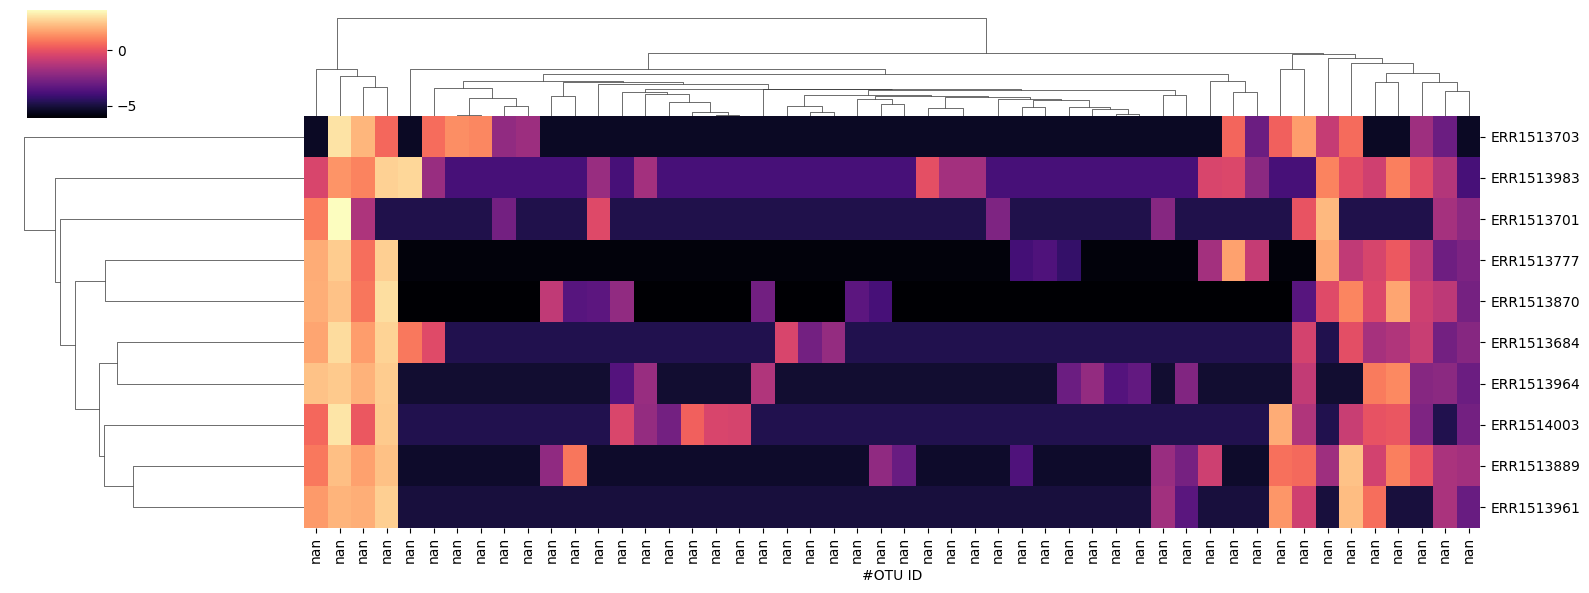

In [42]:
abund_to_plot = abundances
abund_to_plot.index = abund_to_plot.index.str.split(";").str[5]          # Use only the genus name
abund_to_plot = abund_to_plot[~abund_to_plot.index.isin(["g__", "__"])]  # remove unclassified genera
abund_to_plot = abund_to_plot.sample(50, axis=0)                         # use 50 random genera (rows)

# Let's do a centered log-ratio transform: log x_i - log mean(x)
transformed = abund_to_plot.apply(
    lambda xs: np.log(xs + 0.5) - np.log(xs.mean() + 0.5),
    axis=0)

sns.clustermap(transformed.T, cmap="magma", xticklabels=True, figsize=(16, 6))

Now, our data is starting to be interpretable. Each row is a sample, and each column is a bacterial genus. The table values are "counts", or the number of times a genus was detected in a certain sample. We can use relative abundance data to test hypotheses, but it requires special statistical methods because it is ___compositional___

## Differential Abundance Analysis

Explain compositional data + methods for testing

In [45]:
!qiime composition ancombc \
  --i-table genus.qza \
  --m-metadata-file data/metadata.tsv \
  --p-formula "parkinson_disease" \
  --o-differentials ancombc.qza

Saved FeatureData[DifferentialAbundance] to: ancombc.qza


In [46]:
!qiime composition da-barplot \
  --i-data ancombc.qza \
  --p-significance-threshold 0.01 \
  --o-visualization da_barplot.qzv

Saved Visualization to: da_barplot.qzv


## Exercise - Plant a Tree

One visualization that we did not spend a lot of time on was the phylogentic tree of our ASVs. Let's change that! We have seen that there are genera that appear in multiple populations in the previous step. But are the organisms in that genus actually the same?

Let's annotate the tree with our taxonomic classifications and abundances. We will use the empress plugin again but this time with the `community-plot` option. I filled in a template of the command for you. Can you figure out what has to go in the empty spaces?

**QUESTIONS:**

1) Are some of the branch lengths on the tree longer than you would expect? Do you notice anything interesting or suspicious about the taxonomic identities of these branches?

2) Can you find examples of phyla that are polyphyletic (i.e. where clusters of ASVs from the same phylum are found in different locations on the tree, showing different commmon ancestors)? What about polyphyletic taxa at lower taxonomic levels, like at the family or genus levels? Why do you think these patterns exist?

In [ ]:
# This won't run until you fill in the [EMPTY] spots with the right files ;)

!qiime empress community-plot \
    --i-tree [EMPTY] \
    --i-feature-table dada/table.qza \
    --m-sample-metadata-file [EMPTY] \
    --m-feature-metadata-file taxa.qza \
    --o-visualization community-tree-viz.qzv